In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [72]:
file_path = "/content/adarshCsv.csv"
df = pd.read_csv(file_path)

In [52]:
# Display basic information
print("Dataset Overview:")
print(df.info())
print("\nFirst few rows:")
print(df.head())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52955 entries, 0 to 52954
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           52955 non-null  int64  
 1   CustomerID           52924 non-null  float64
 2   Gender               52924 non-null  object 
 3   Location             52924 non-null  object 
 4   Tenure_Months        52924 non-null  float64
 5   Transaction_ID       52924 non-null  float64
 6   Transaction_Date     52924 non-null  object 
 7   Product_SKU          52924 non-null  object 
 8   Product_Description  52924 non-null  object 
 9   Product_Category     52955 non-null  object 
 10  Quantity             52924 non-null  float64
 11  Avg_Price            52924 non-null  float64
 12  Delivery_Charges     52924 non-null  float64
 13  Coupon_Status        52924 non-null  object 
 14  GST                  52924 non-null  float64
 15  Date              

In [53]:
# Renaming columns
df.rename(columns={
    'Unnamed: 0': 'Index',
    'CustomerID': 'Customer_ID',
    'Gender': 'Gender',
    'Location': 'Customer_Location',
    'Tenure_Months': 'Tenure_in_Months',
    'Transaction_ID': 'Transaction_ID',
    'Transaction_Date': 'Transaction_Date',
    'Product_SKU': 'Product_SKU',
    'Product_Description': 'Product_Description',
    'Product_Category': 'Category_of_Product',
    'Quantity': 'Quantity_Purchased',
    'Avg_Price': 'Average_Price',
    'Delivery_Charges': 'Delivery_Charges',
    'Coupon_Status': 'Coupon_Availability',
    'GST': 'Goods_and_Service_Tax',
    'Date': 'Date_of_Purchase',
    'Offline_Spend': 'Spending_Offline',
    'Online_Spend': 'Spending_Online',
    'Month': 'Purchase_Month',
    'Coupon_Code': 'Code_of_Coupon',
    'Discount_pct': 'Discount_Percentage',
    'Total_Spending': 'Overall_Spending',
    'Total_Spend': 'Aggregate_Spending',
    'Day_of_Week': 'Day_of_Purchase',
    'Spending_Ratio': 'Ratio_of_Spending'
}, inplace=True)

# Displaying updated columns
print(df.columns)


Index(['Index', 'Customer_ID', 'Gender', 'Customer_Location',
       'Tenure_in_Months', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Category_of_Product', 'Quantity_Purchased',
       'Average_Price', 'Delivery_Charges', 'Coupon_Availability',
       'Goods_and_Service_Tax', 'Date_of_Purchase', 'Spending_Offline',
       'Spending_Online', 'Purchase_Month', 'Code_of_Coupon',
       'Discount_Percentage'],
      dtype='object')


In [54]:
print("\nChecking for missing values:")
print(df.isnull().sum())



Checking for missing values:
Index                      0
Customer_ID               31
Gender                    31
Customer_Location         31
Tenure_in_Months          31
Transaction_ID            31
Transaction_Date          31
Product_SKU               31
Product_Description       31
Category_of_Product        0
Quantity_Purchased        31
Average_Price             31
Delivery_Charges          31
Coupon_Availability       31
Goods_and_Service_Tax     31
Date_of_Purchase          31
Spending_Offline          31
Spending_Online           31
Purchase_Month             0
Code_of_Coupon           400
Discount_Percentage      400
dtype: int64


In [73]:
print(df.columns)


Index(['Unnamed: 0', 'CustomerID', 'Gender', 'Location', 'Tenure_Months',
       'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'GST', 'Date', 'Offline_Spend',
       'Online_Spend', 'Month', 'Coupon_Code', 'Discount_pct'],
      dtype='object')


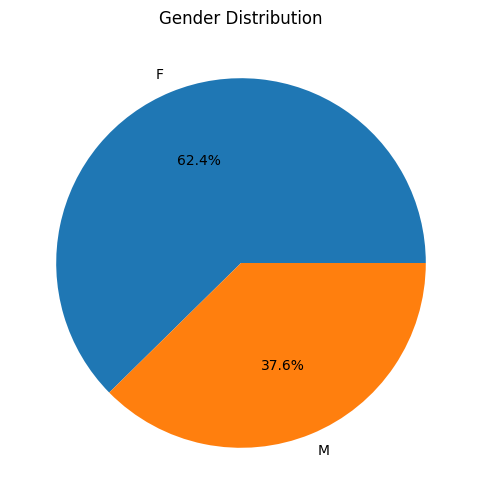

In [74]:
# Gender Distribution
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()


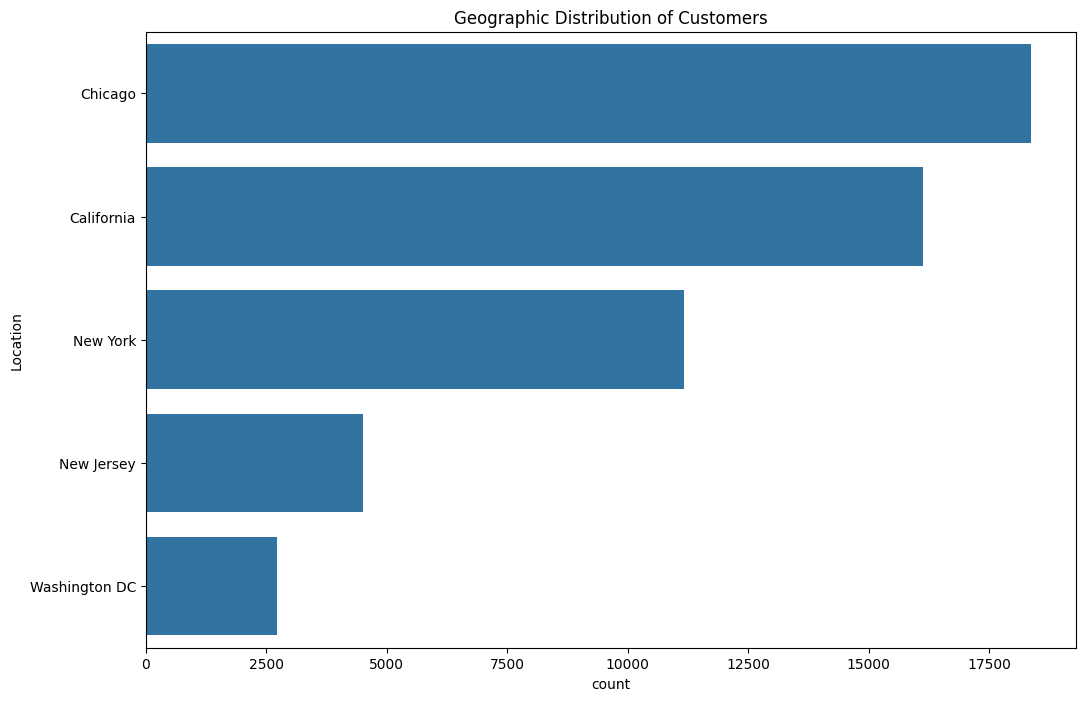

In [75]:
# Geographic Distribution
plt.figure(figsize=(12, 8))
sns.countplot(y='Location', data=df, order=df['Location'].value_counts().index)
plt.title('Geographic Distribution of Customers')
plt.show()


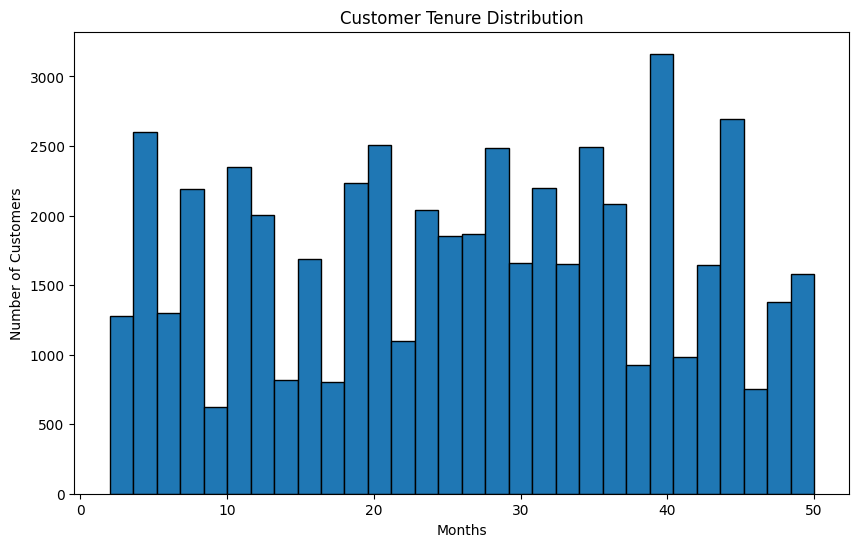

In [76]:
# Customer Tenure Distribution
plt.figure(figsize=(10, 6))
plt.hist(df['Tenure_Months'], bins=30, edgecolor='k')
plt.title('Customer Tenure Distribution')
plt.xlabel('Months')
plt.ylabel('Number of Customers')
plt.show()


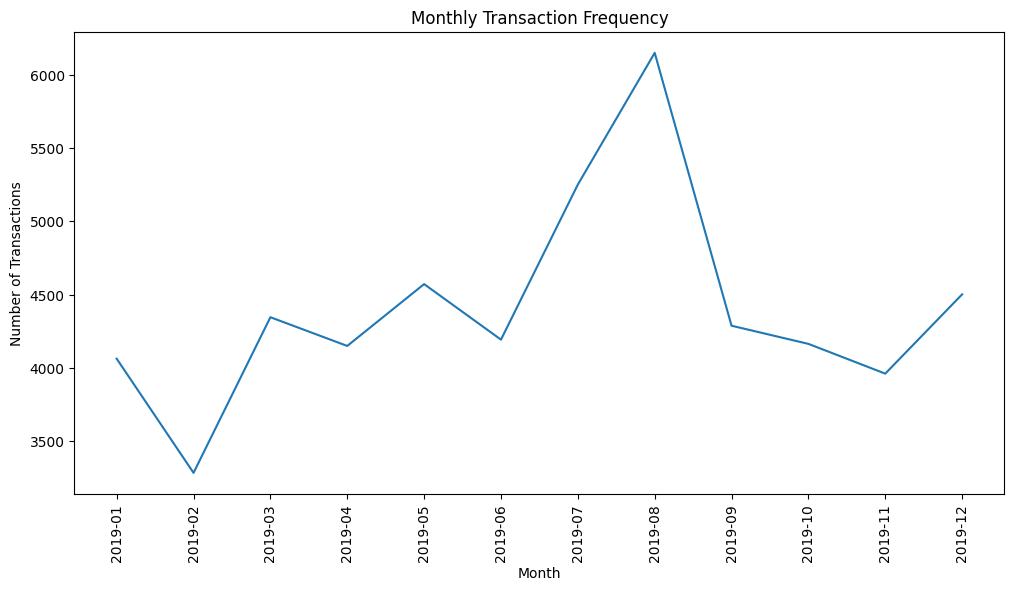

In [77]:
# Transaction Frequency
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])
df['Month'] = df['Transaction_Date'].dt.to_period('M')
transaction_freq = df['Month'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.plot(transaction_freq.index.astype(str), transaction_freq.values)
plt.title('Monthly Transaction Frequency')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=90)
plt.show()


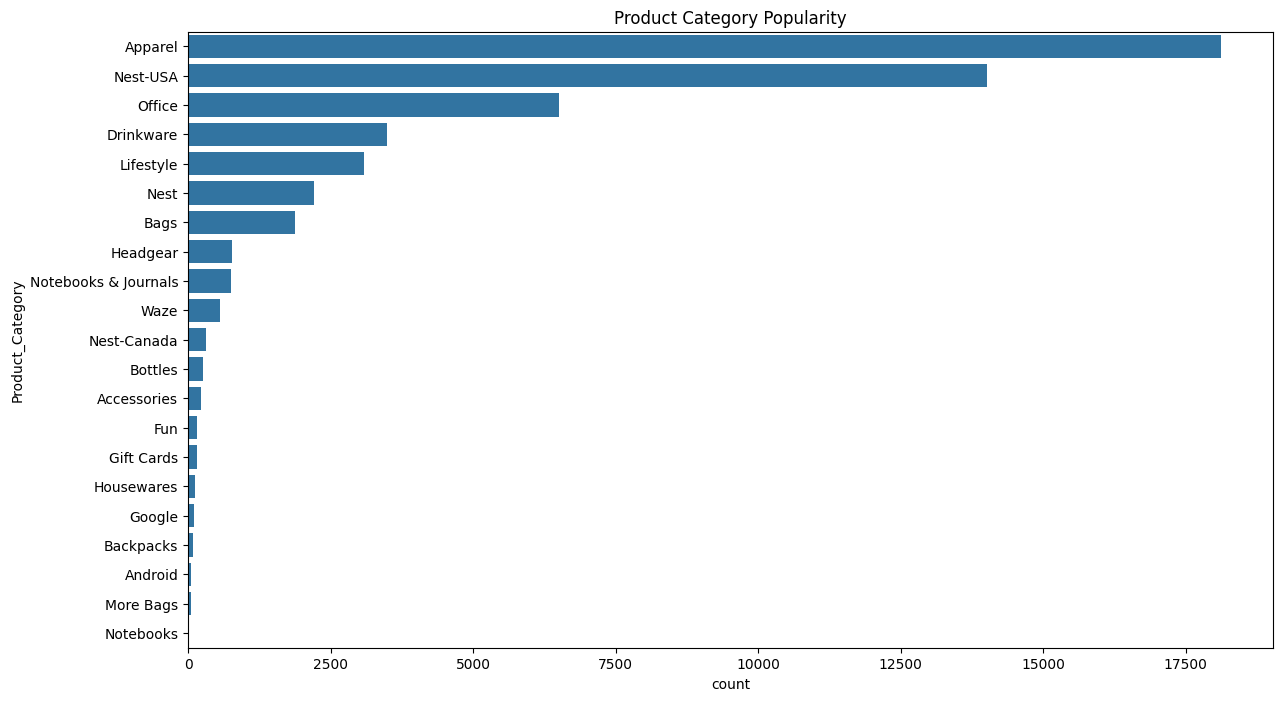

In [78]:
# Product Category Popularity
plt.figure(figsize=(14, 8))
sns.countplot(y='Product_Category', data=df, order=df['Product_Category'].value_counts().index)
plt.title('Product Category Popularity')
plt.show()


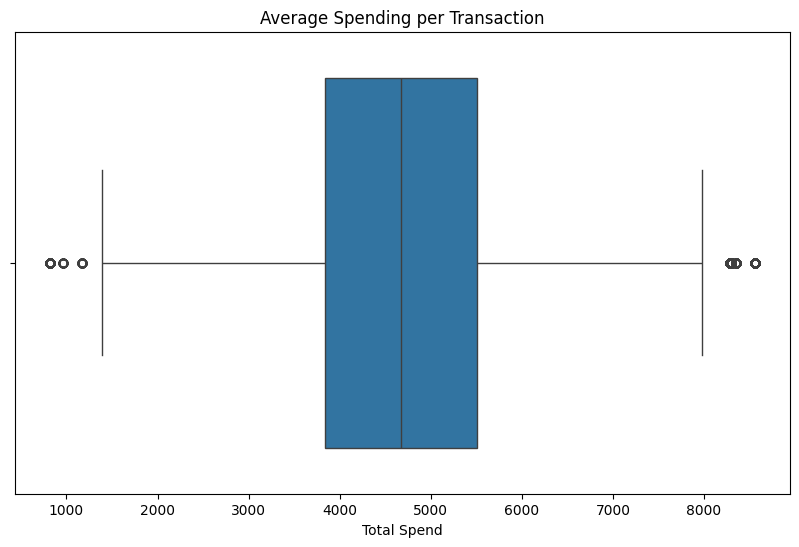

In [79]:
# Average Spending per Transaction
df['Total_Spend'] = df['Offline_Spend'] + df['Online_Spend']
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Total_Spend'])
plt.title('Average Spending per Transaction')
plt.xlabel('Total Spend')
plt.show()


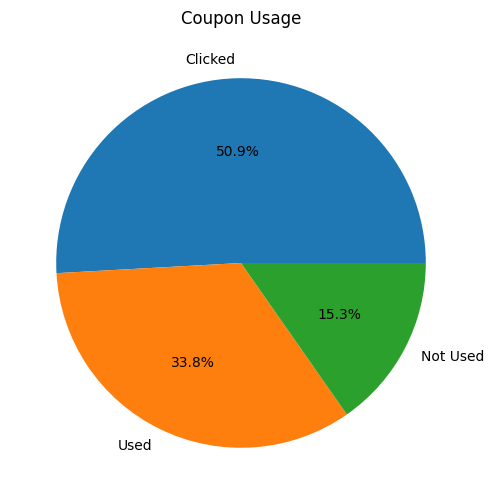

In [80]:
# Coupon Usage
coupon_status_counts = df['Coupon_Status'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(coupon_status_counts, labels=coupon_status_counts.index, autopct='%1.1f%%')
plt.title('Coupon Usage')
plt.show()


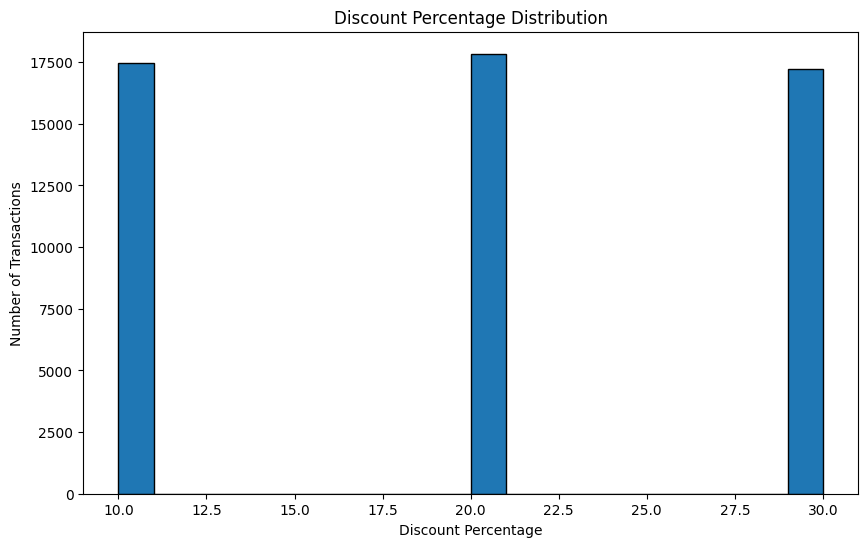

In [81]:
# Discount Percentage Distribution
plt.figure(figsize=(10, 6))
plt.hist(df['Discount_pct'], bins=20, edgecolor='k')
plt.title('Discount Percentage Distribution')
plt.xlabel('Discount Percentage')
plt.ylabel('Number of Transactions')
plt.show()


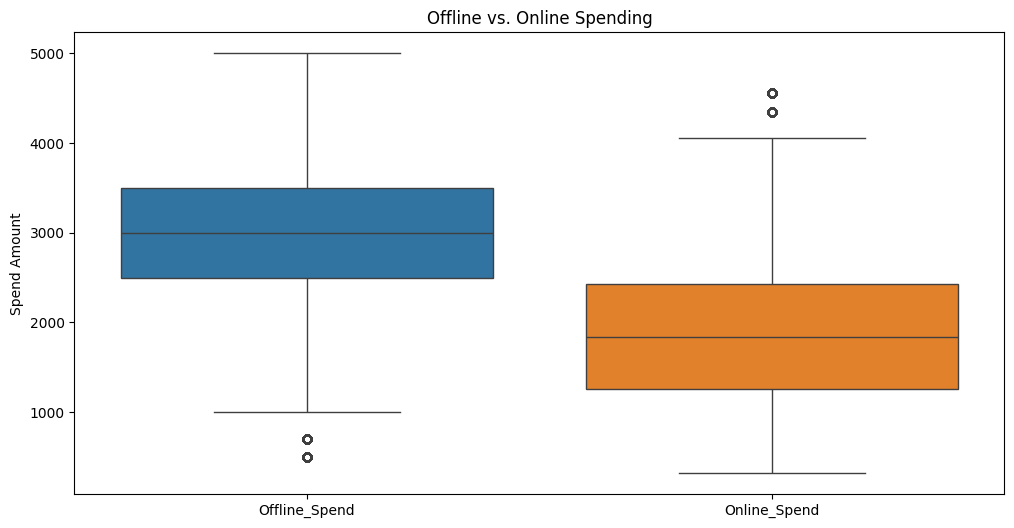

In [82]:
# Offline vs. Online Spending
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Offline_Spend', 'Online_Spend']])
plt.title('Offline vs. Online Spending')
plt.ylabel('Spend Amount')
plt.show()


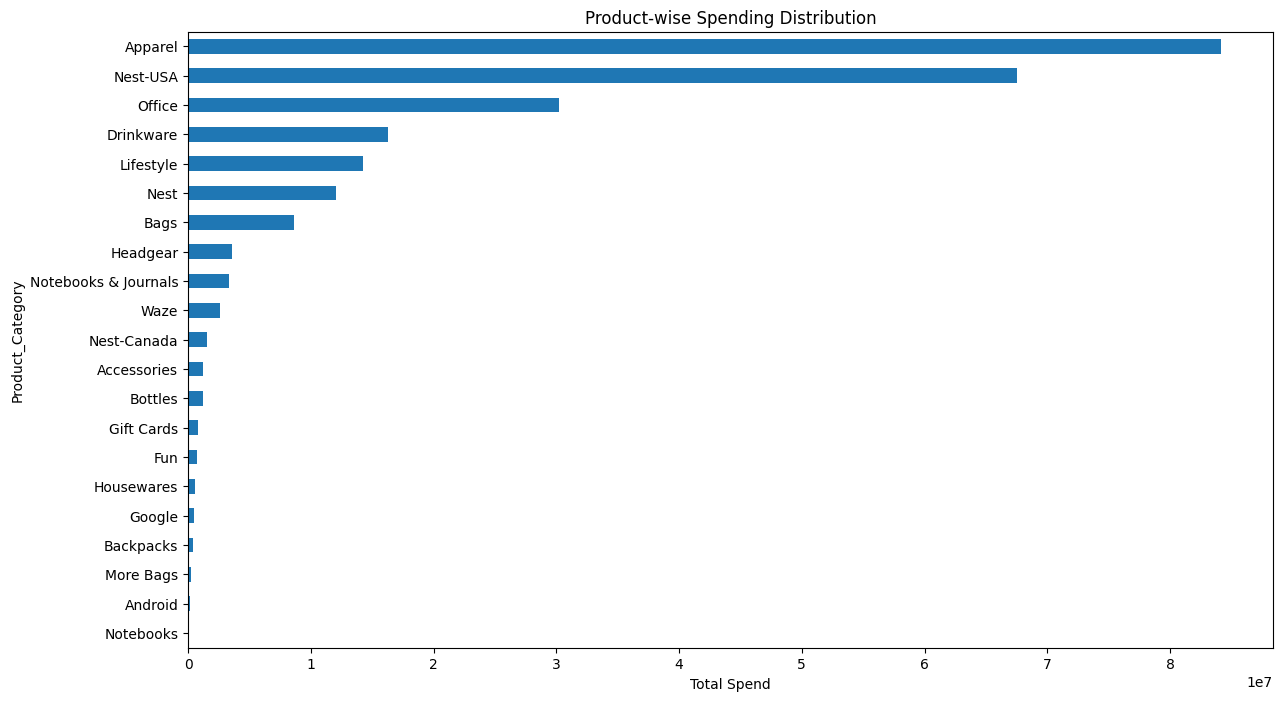

In [83]:
# Product-wise Spending Distribution
product_spend = df.groupby('Product_Category')['Total_Spend'].sum().sort_values()
plt.figure(figsize=(14, 8))
product_spend.plot(kind='barh')
plt.title('Product-wise Spending Distribution')
plt.xlabel('Total Spend')
plt.show()


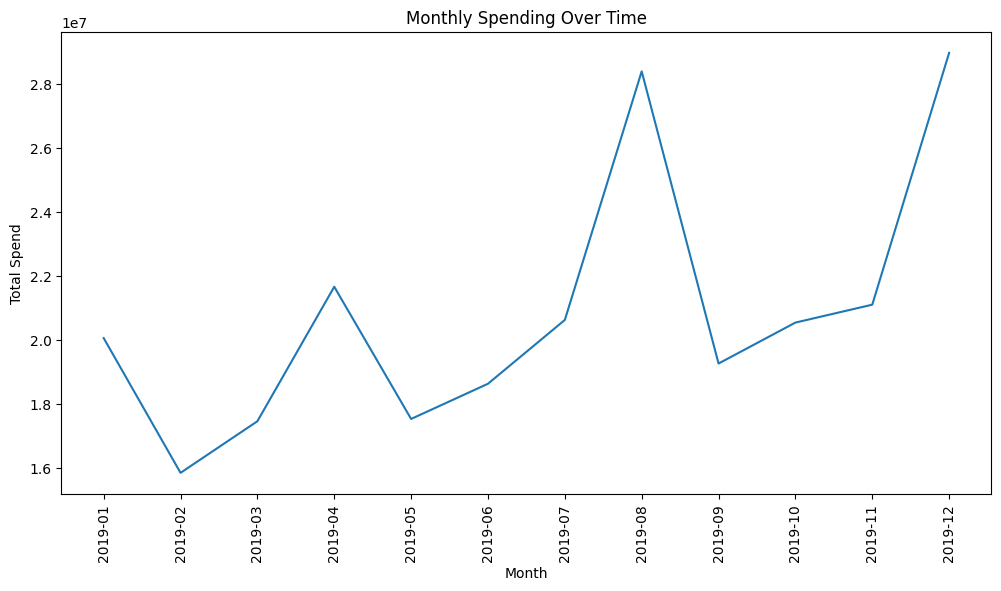

In [84]:
# Temporal Analysis of Spending
monthly_spend = df.groupby(df['Transaction_Date'].dt.to_period('M'))['Total_Spend'].sum()
plt.figure(figsize=(12, 6))
plt.plot(monthly_spend.index.astype(str), monthly_spend.values)
plt.title('Monthly Spending Over Time')
plt.xlabel('Month')
plt.ylabel('Total Spend')
plt.xticks(rotation=90)
plt.show()


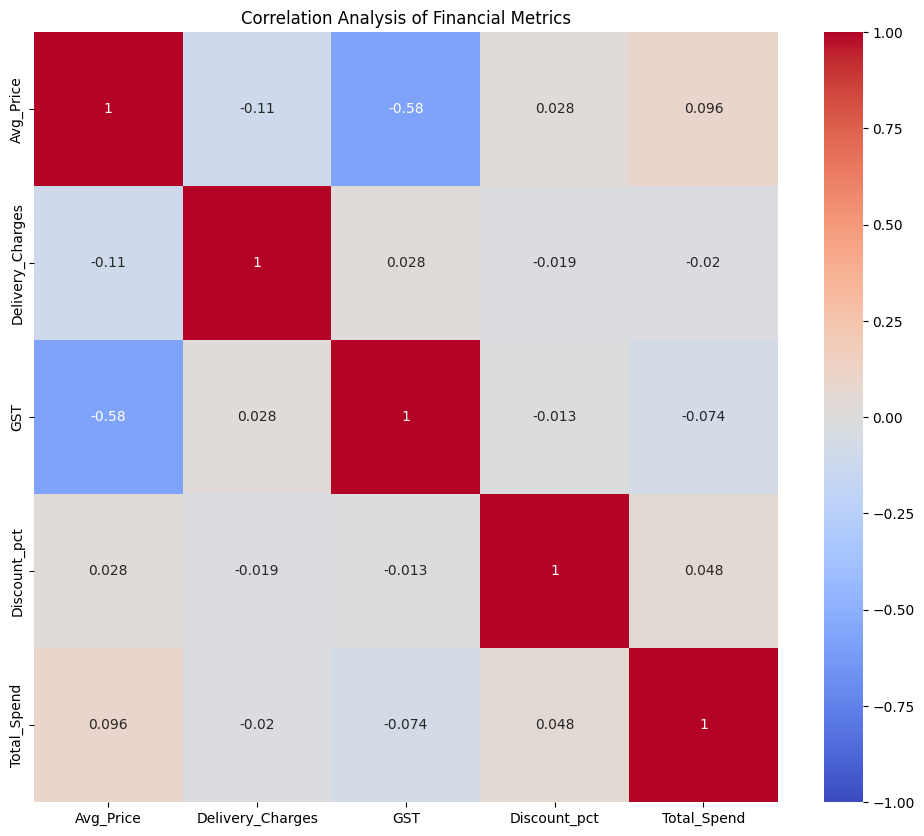

In [85]:
# Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df[['Avg_Price', 'Delivery_Charges', 'GST', 'Discount_pct', 'Total_Spend']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Analysis of Financial Metrics')
plt.show()


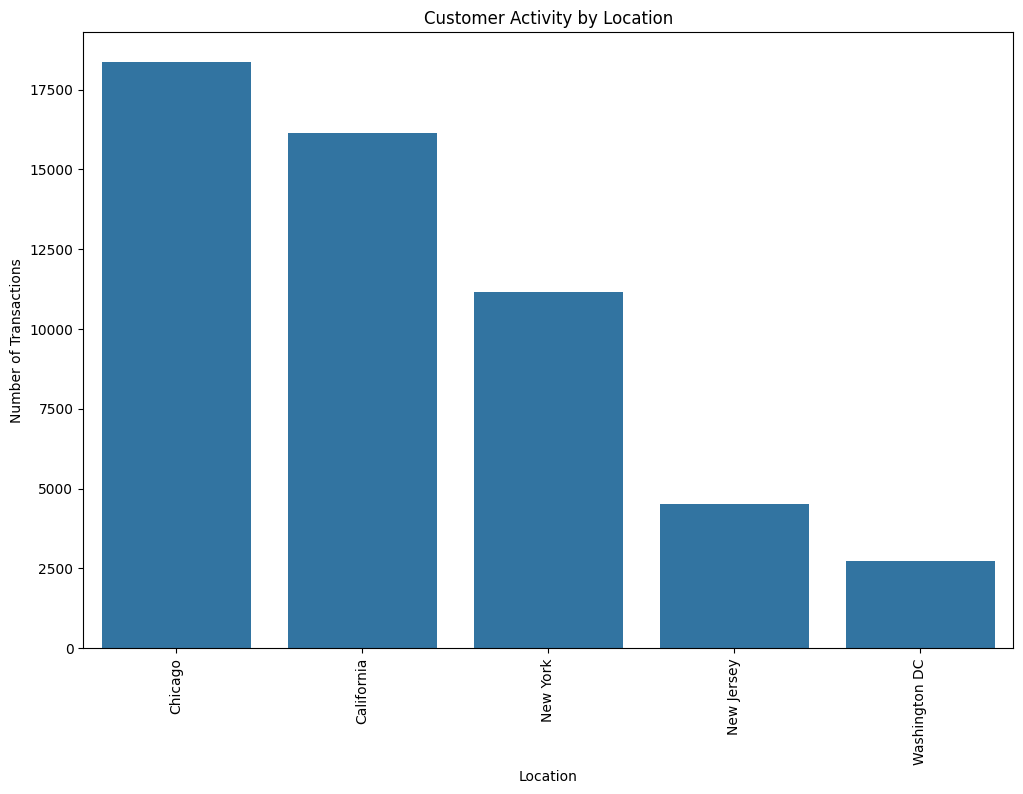

In [86]:
# Customer Activity by Location
location_activity = df['Location'].value_counts()
plt.figure(figsize=(12, 8))
sns.barplot(x=location_activity.index, y=location_activity.values)
plt.title('Customer Activity by Location')
plt.xlabel('Location')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=90)
plt.show()


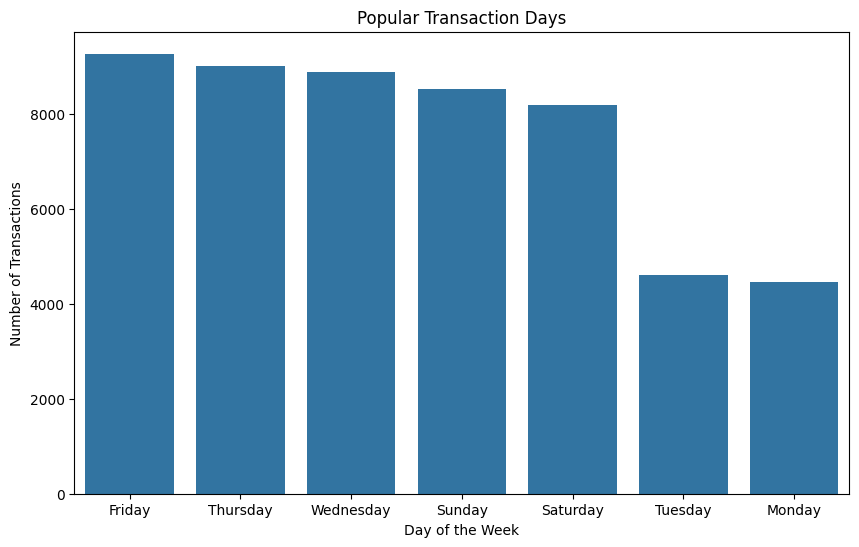

In [87]:
# Popular Transaction Days
df['Transaction_Day'] = df['Transaction_Date'].dt.day_name()
transaction_days = df['Transaction_Day'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=transaction_days.index, y=transaction_days.values)
plt.title('Popular Transaction Days')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')
plt.show()


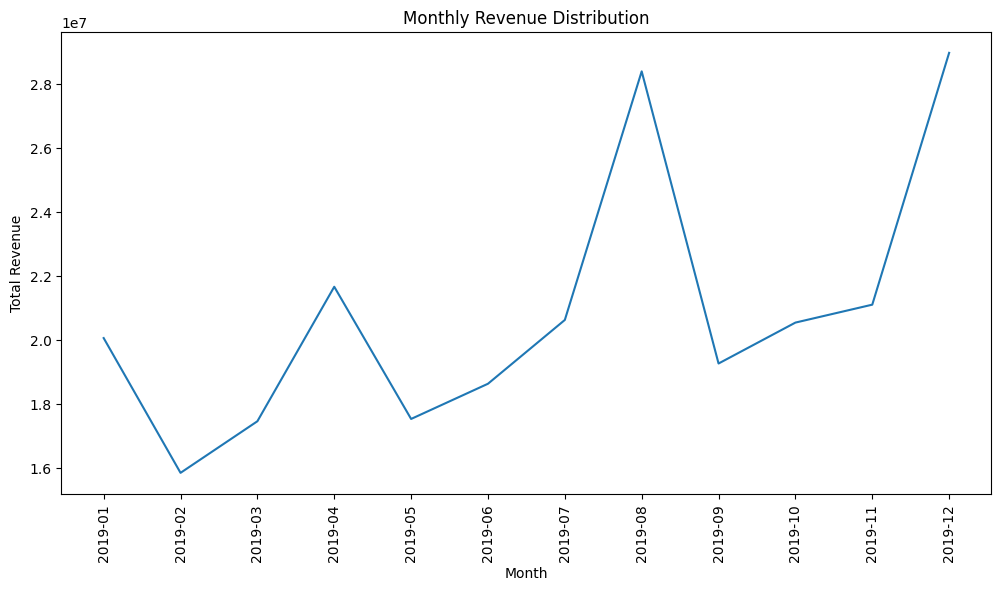

In [88]:
# Revenue Distribution by Month
monthly_revenue = df.groupby(df['Transaction_Date'].dt.to_period('M'))['Total_Spend'].sum()
plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue.index.astype(str), monthly_revenue.values)
plt.title('Monthly Revenue Distribution')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=90)
plt.show()


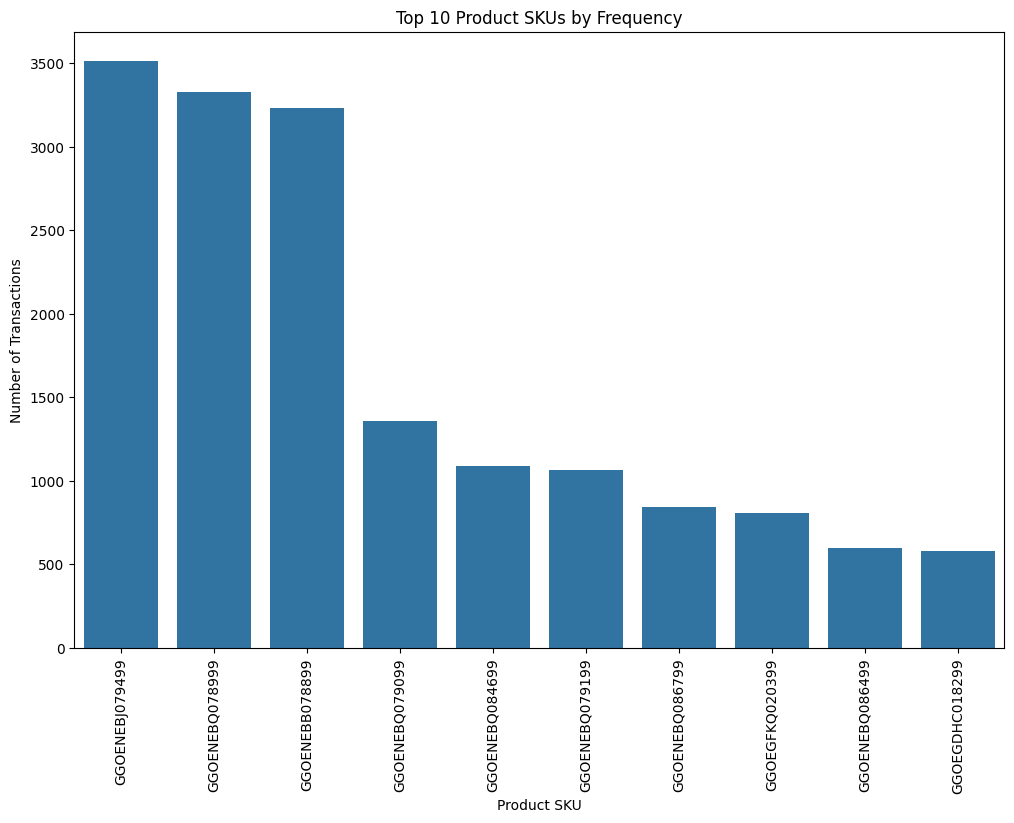

In [89]:
# Product SKU Popularity
product_sku_popularity = df['Product_SKU'].value_counts().head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=product_sku_popularity.index, y=product_sku_popularity.values)
plt.title('Top 10 Product SKUs by Frequency')
plt.xlabel('Product SKU')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=90)
plt.show()


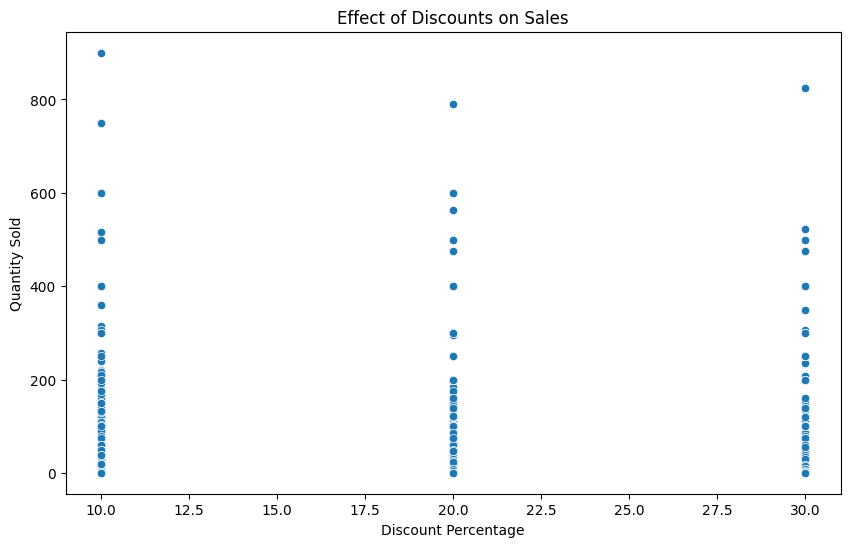

In [90]:
# Effect of Discounts on Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount_pct', y='Quantity', data=df)
plt.title('Effect of Discounts on Sales')
plt.xlabel('Discount Percentage')
plt.ylabel('Quantity Sold')
plt.show()
